# Pymaceuticals Inc.
---

### Analysis

- Mice that weigh more tend to have larger tumors, however, this could be influenced by outside factors
- Mice treated with Capomulin and Ramicane had lower tumor volumes
- Possible inconsistent responses to infubinol. Some mice had unusually high or low tumor volumes on this medicine. Reactions to to the treatment from mice or uncontrollable factors
 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [4]:
# Checking the number of mice.
unique_mouse_count = merged_df['Mouse ID'].nunique()
print("Number of unique mice IDs:", unique_mouse_count)

Number of unique mice IDs: 249


In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Check if there are any duplicates
if not duplicate_mice.empty:
    print("Duplicate Mouse IDs and Timepoints found:")
    print(duplicate_mice)
else:
    print("No duplicate Mouse ID and Timepoint combinations found.")
    
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Extract the unique Mouse IDs that appear as duplicates
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
print("Duplicate Mouse IDs:", duplicate_mouse_ids)

# Display the data for these duplicate mouse IDs
print("Data for duplicate Mouse IDs:\n", duplicate_mice)


Duplicate Mouse IDs and Timepoints found:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801          

In [10]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

all_duplicate_data = merged_df[merged_df['Mouse ID'].isin(duplicate_mouse_ids)]

print("All data for the duplicate Mouse IDs:\n", all_duplicate_data)

All data for the duplicate Mouse IDs:
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva

In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

cleaned_df = merged_df[~merged_df['Mouse ID'].isin(duplicate_mouse_ids)]

print("Cleaned DataFrame created. Number of unique Mouse IDs after cleaning:", cleaned_df['Mouse ID'].nunique())
print(cleaned_df.head())

Cleaned DataFrame created. Number of unique Mouse IDs after cleaning: 248
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [13]:
# Checking the number of mice in the clean DataFrame.

unique_mouse_count_cleaned = cleaned_df['Mouse ID'].nunique()
print("Number of unique mice in the cleaned DataFrame:", unique_mouse_count_cleaned)

Number of unique mice in the cleaned DataFrame: 248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grouped_data = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']


summary_stats = pd.DataFrame({
    'Mean': grouped_data.mean(),
    'Median': grouped_data.median(),
    'Variance': grouped_data.var(),
    'Standard Deviation': grouped_data.std(),
    'SEM': grouped_data.sem()
})


print("Summary Statistics for each Drug Regimen:")
print(summary_stats)

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


Summary Statistics for each Drug Regimen:
                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)


print("Summary Statistics for each Drug Regimen:")
print(summary_stats)




Summary Statistics for each Drug Regimen:
                   Mean     Median   Variance  Standard_Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

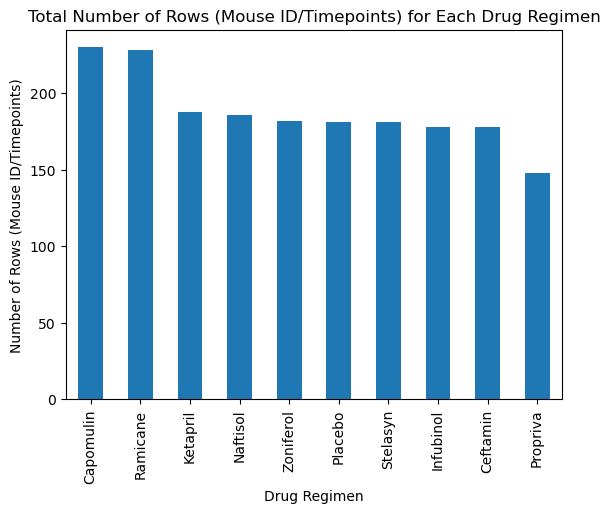

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_df['Drug Regimen'].value_counts()


regimen_counts.plot(kind='bar', title='Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.show()

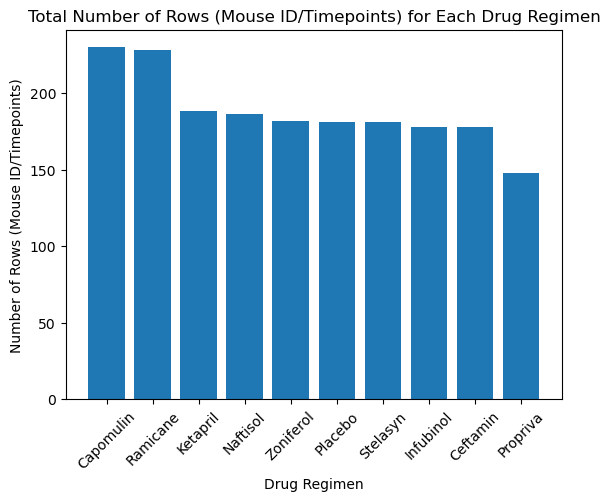

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Count the number of rows for each drug regimen
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Generate a bar plot using pyplot
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=45)
plt.show()

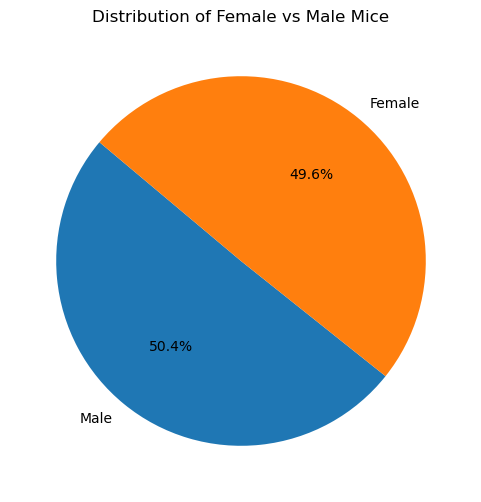

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Female vs Male Mice', startangle=140, figsize=(6, 6))
plt.ylabel('') 
plt.show()

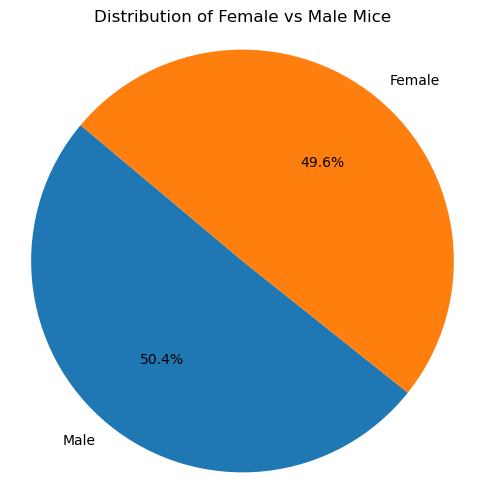

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
import matplotlib.pyplot as plt

# Get the unique mice with their gender
unique_mice = cleaned_df.drop_duplicates(subset='Mouse ID')
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
labels = gender_counts.index.tolist()
sizes = gender_counts.values.tolist()

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(selected_regimens)]

last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

final_tumor_volume = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

print("Final tumor volume for each mouse in the selected regimens:")
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

print("Last timepoint for each mouse:")
print(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

final_tumor_volume = pd.merge(last_timepoint, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

print("Tumor volume at the last timepoint for each mouse:")
print(final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

Final tumor volume for each mouse in the selected regimens:
   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]
Last timepoint for each mouse:
    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = cleaned_df['Drug Regimen'].unique().tolist()

print("List of treatments:", treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

print("Empty list for tumor volume data created:", tumor_vol_data)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for treatment in treatments:

    tumor_volumes = cleaned_df.loc[cleaned_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
   
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    

    print(f"\nTreatment: {treatment}")
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Potential outliers: {outliers.values}")


List of treatments: ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
Empty list for tumor volume data created: []

Treatment: Capomulin
Q1: 37.685932865, Q3: 45.0, IQR: 7.314067135000002
Lower bound: 26.714832162499995, Upper bound: 55.9711007025
Potential outliers: [25.47214326 23.34359787]

Treatment: Ramicane
Q1: 36.674634585, Q3: 45.0, IQR: 8.325365415
Lower bound: 24.1865864625, Upper bound: 57.488048122500004
Potential outliers: [22.05012627]

Treatment: Infubinol
Q1: 47.3123533, Q3: 57.314443967500004, IQR: 10.002090667500006
Lower bound: 32.309217298749985, Upper bound: 72.31757996875001
Potential outliers: []

Treatment: Ceftamin
Q1: 47.2084271125, Q3: 56.801437570000004, IQR: 9.593010457500007
Lower bound: 32.81891142624998, Upper bound: 71.19095325625001
Potential outliers: []


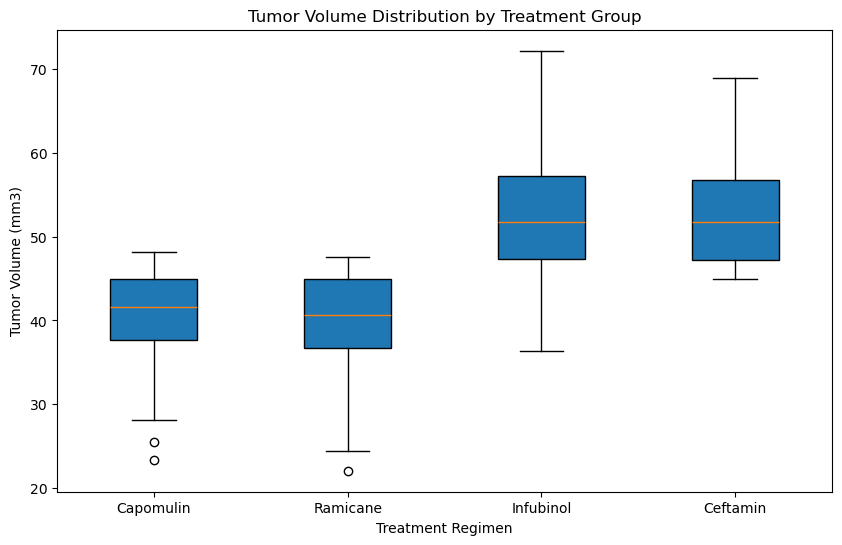

In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

import matplotlib.pyplot as plt

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_vol_data = [cleaned_df.loc[cleaned_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatments]

plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)

plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

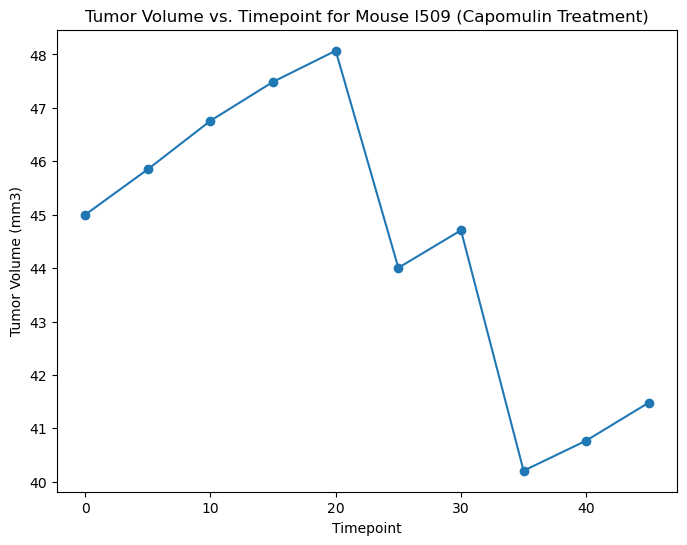

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

import matplotlib.pyplot as plt

mouse_id = 'l509'
mouse_data = cleaned_df[(cleaned_df['Drug Regimen'] == 'Capomulin') & (cleaned_df['Mouse ID'] == mouse_id)]

plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-')

plt.title(f'Tumor Volume vs. Timepoint for Mouse {mouse_id} (Capomulin Treatment)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

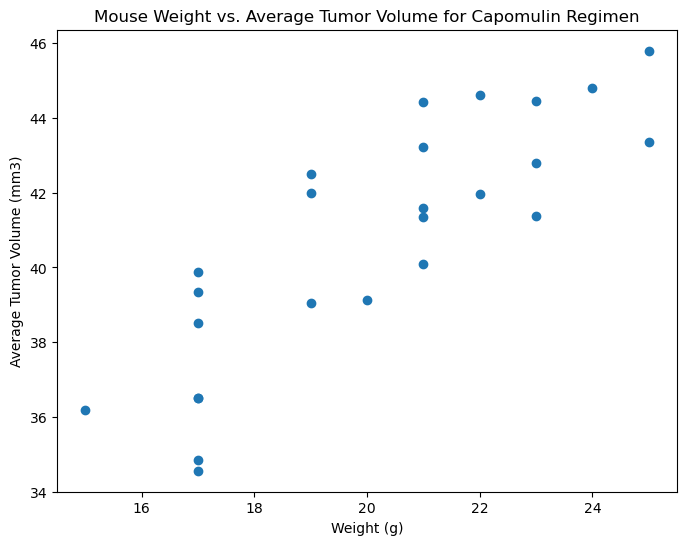

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Tumor Volume (mm3)']

mouse_weight = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Weight (g)']

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume)

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and average tumor volume: 0.84


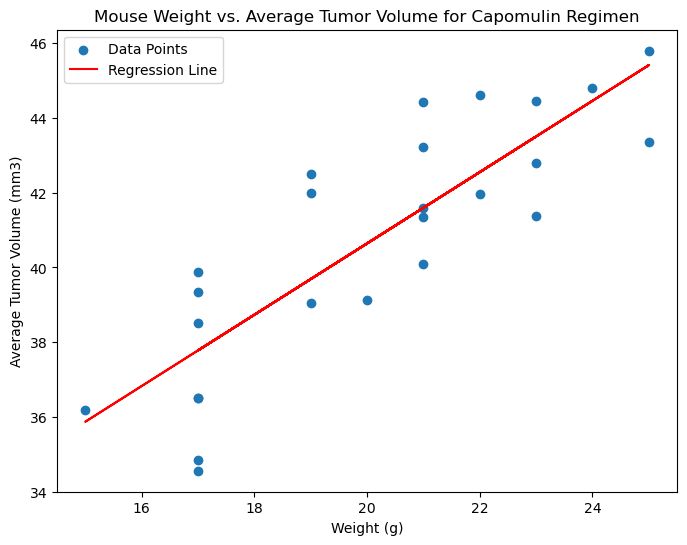

In [33]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Tumor Volume (mm3)']

mouse_weight = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)['Weight (g)']

correlation = mouse_weight.corr(avg_tumor_volume)
print(f"Correlation coefficient between mouse weight and average tumor volume: {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)

regression_line = slope * mouse_weight + intercept

plt.figure(figsize=(8, 6))
plt.scatter(mouse_weight, avg_tumor_volume, label='Data Points')
plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')

plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()
